### Amplitude Amplification (Grover's Algorithm Generalization)

1. Import libraries:

In [14]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

2. Implement Grover's Algorithm:

In [15]:
def oracle(circuit):
    """Mark the state |101⟩ by flipping its phase."""
    circuit.x(1)
    circuit.h(2)
    circuit.ccx(0, 1, 2)
    circuit.h(2)
    circuit.x(1)

def diffuser(circuit):
    """Grover diffusion operator (inversion about the mean)."""
    circuit.h(range(3))
    circuit.x(range(3))
    circuit.h(2)
    circuit.ccx(0, 1, 2)
    circuit.h(2)
    circuit.x(range(3))
    circuit.h(range(3))

3. Create a 3-qubit circuit:

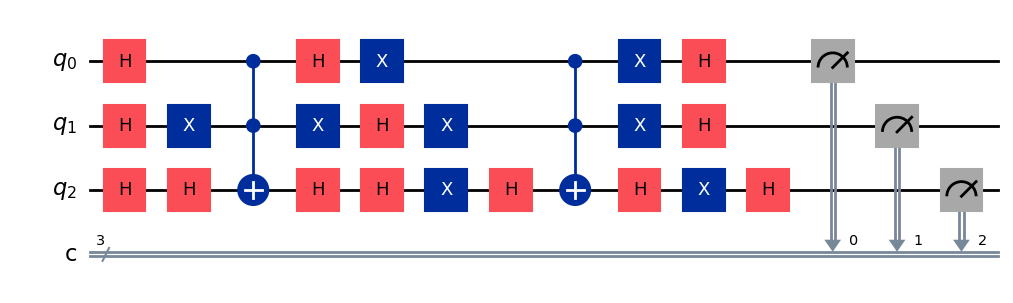

In [16]:
# Number of qubits:
N = 3
grover_qc = QuantumCircuit(N, N)

# Start in uniform superposition
grover_qc.h(range(N))

# Apply Grover operator (1 iteration)
oracle(grover_qc)
diffuser(grover_qc)

# Measure all qubits
grover_qc.measure(range(N), range(N))

# Draw the circuit
grover_qc.draw('mpl')

4. Run the algorithm:

Target state: |101⟩
Measurement counts:  {'001': 33, '110': 28, '111': 31, '011': 30, '000': 33, '010': 40, '100': 25, '101': 804}


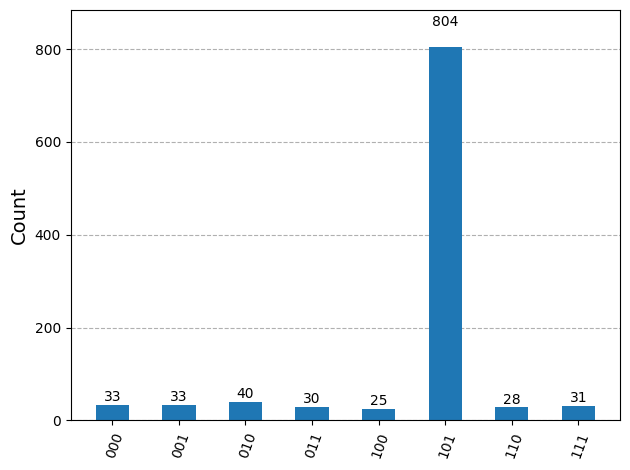

In [17]:
# Simulate the circuit:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(grover_qc, shots=1024).result()
counts = result.get_counts()

# Show results:
print("Target state: |101⟩")
print("Measurement counts: ", counts)

# Plot output histogram:
plot_histogram(counts)